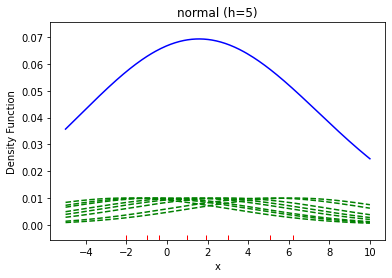

In [8]:
# 커널 함수란 적분 값이 1이며, 원점을 중심으로 대칭인, Non-negative인 함수를 의미함
# 아래 코드는 커널 함수 종류에 따른 밀도 추정 결과를 쉽게 확인할 수 있음
# 출처 : https://sungkee-book.tistory.com/2

import random
import numpy as np
import seaborn as sns

data = [-2, 1, -1, 3, -0.4, 1.9, 5.1, 6.2]
h = 5
kernel = 'normal'

len_array = 1000
p_x = np.zeros(len_array)
x = np.array(sorted(np.random.uniform(-5, 10, len_array)))

def kernel_function(kernel, u):
  if kernel == 'normal':
    return normal_kernel(u)
  elif kernel == 'uniform':
    return uniform_kernel(u)
  elif kernel == 'triangular':
    return triangular_kernel(u)
  elif kernel == 'epanechnikov':
    return epanechnikov_kernel(u)
  elif kernel =='quartic':
    return quartic_kernel(u)
  elif kernel == 'triweight':
    return triweight_kernel(u)
  elif kernel == 'tricube':
    return tricube_kernel(u)
  elif kernel == 'cosine':
    return cosine_kernel(u)
  else:
    print("[ERROR] Incorrect Kernel Function Name")

def normal_kernel(u):
  return np.exp(-(np.abs(u)**2)/2)/(h*np.sqrt(2*np.pi))

def uniform_kernel(u):
  return np.where(np.abs(u)<=1,1,0)/1

def triangular_kernel(u):
  return (1-np.abs(u))*np.where(np.abs(u)<=1,1,0)

def epanechnikov_kernel(u):
  return (3*(1-u**2)*np.where(np.abs(u)<=1,1,0))/4

def quartic_kernel(u):
  return ((15*((1-u**2)**2))*np.where(np.abs(u)<=1,1,0))/16

def triweight_kernel(u):
  return ((35*((1-u**2)**3))*np.where(np.abs(u)<=1,1,0))/32

def tricube_kernel(u):
  return ((70*((1-np.abs(u)**3)**3))*np.where(np.abs(u)<=1,1,0))/81

def cosine_kernel(u):
  return (np.pi*np.cos(np.pi*u/2)*np.where(np.abs(u)<=1,1,0)/2)/4

for x_i in data:
  u = (x-x_i)/h
  p_x_i=np.array(kernel_function(kernel, u))/len(data)
  p_x += p_x_i 
  sns.lineplot(x=x, y=p_x_i, color='green', linestyle='--')

sns.lineplot(x=x, y=p_x, color='blue').set(title='{} (h={})'.format(kernel, h), xlabel='x', ylabel='Density Function')
sns.rugplot(data, height=0.02, color='red')
